<a href="https://colab.research.google.com/github/CillaCole/Food-Sales-Predictions/blob/main/Food_Sales_Predictions_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Prediction Part 3
- Priscilla Cole
- August 31, 2022

In [4]:
import pandas as pd
filename = '/content/sales_predictions.csv'

In [5]:
df = pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# how many rows and columns
len(df)

8523

In [7]:
len(df.columns)

12

In [8]:
# datatypes for each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
# duplicates? drop duplicates
df.duplicated().sum()

0

In [10]:
# identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# address missing values and explain choices
df['Item_Weight'].mean()
# choosing to fill missing values with the aggregate mean because weight is an important numerical column

12.857645184135976

In [12]:
df['Item_Weight'].fillna(value = df['Item_Weight'].mean(), inplace = True)

In [13]:
# choosing to remove outlet_size column due to no SME being available and no education value to impute
df.drop(columns = ['Outlet_Size'] , inplace = True)

In [14]:
# confirm that there are no more missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
# address inconsistencies with categories
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')

In [17]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [18]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
# obtain min, max and mean for all numerical data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

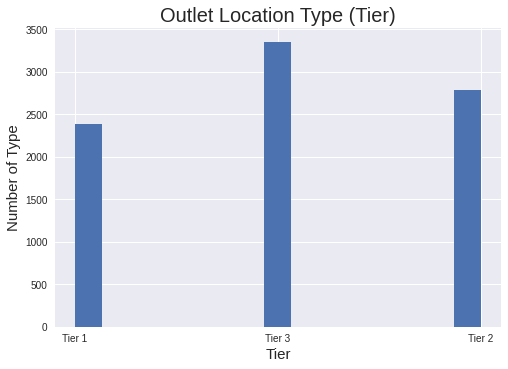

In [30]:
# Histogram to view the distributions of various features in your dataset. 
df['Outlet_Location_Type'].hist(bins='auto')
plt.xlabel('Tier', fontsize=15)
plt.ylabel('Number of Type', fontsize=15)
plt.title('Outlet Location Type (Tier)', fontsize=20)
plt.show()

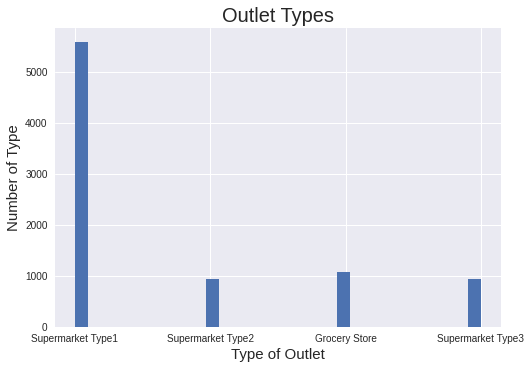

In [27]:
df['Outlet_Type'].hist(bins='auto')
plt.xlabel('Type of Outlet', fontsize=15)
plt.ylabel('Number of Type', fontsize=15)
plt.title('Outlet Types', fontsize=20)
plt.show()

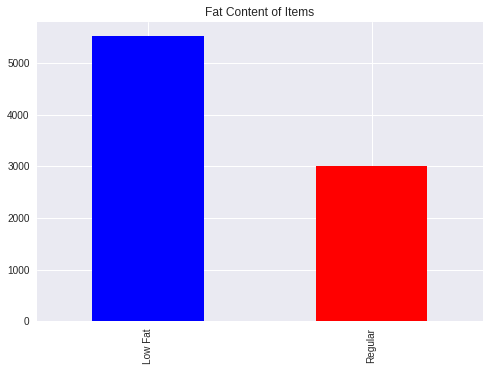

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
fat_content = df['Item_Fat_Content'].value_counts()

fat_content.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Fat Content of Items')
plt.show()

fat_content

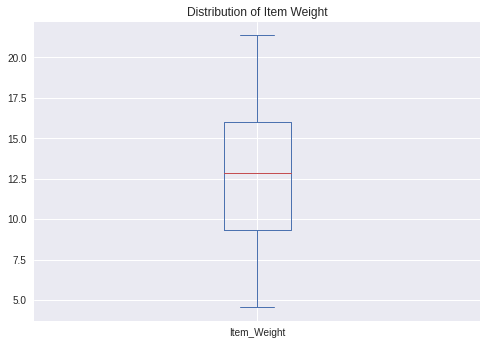

In [34]:
# Boxplot to view statistical summaries of various features in your dataset. Item fat content and outlet sales, also item weight and outlet sales
df['Item_Weight'].plot(kind='box')
plt.title('Distribution of Item Weight')
plt.show()

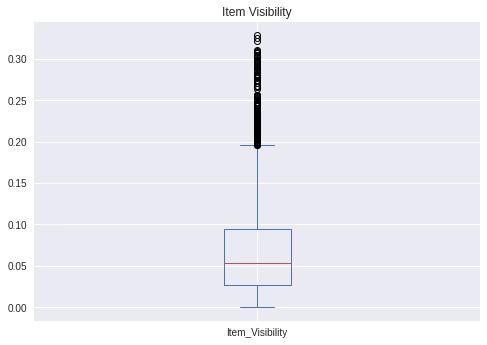

In [43]:
df['Item_Visibility'].plot(kind='box')
plt.title('Item Visibility')
plt.show()

In [44]:
# Heatmap of the correlation between features. Location type and establishment year, also location type and outlet type
corr = df.corr()

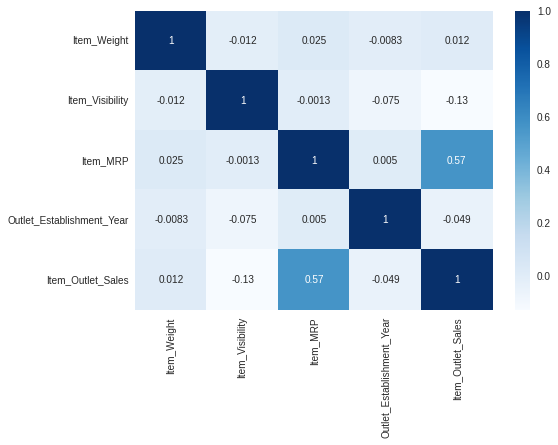

In [47]:
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.show()